In [1]:
import random
import numpy as np


class grid:
    x = [0, 1, 0, -1]
    y = [-1, 0, 1, 0]

    def __init__(self, grid, exits, noise):
        self.grid = grid
        self.exits = exits
        self.noise = noise

    def move(self, state, action):
        if random.random() < self.noise:
            action = random.randrange(4)

        new_state = (state[0] + self.x[action], state[1] + self.y[action])

        return new_state if self.isvalid(new_state) else state

    def isvalid(self, state):
        return (0 <= state[0] < self.grid.shape[0]) and (0 <= state[1] < self.grid.shape[1])

    def random_run(self, start):
        state = start
        reward = 0
        while state not in self.exits:
            action = random.randrange(4)
            state = self.move(state, action)
            reward += self.grid[state[0], state[1]]

        return state, reward

    def qlearn(self, start, epochs, gamma, lr, eps):
        self.q = np.zeros((*self.grid.shape, 4))
        rewards = []
        for i in range(epochs):
            state = start
            reward = 0
            while state not in self.exits:
                action = (
                    self.q[state[0], state[1]].argmax()
                    if random.random() < (1 - eps)
                    else random.randrange(4)
                )
                new_state = self.move(state, action)
                r = self.grid[new_state[0], new_state[1]]

                self.q[state[0], state[1], action] = (1 - lr) * self.q[state[0], state[1], action] + lr * (
                    r + gamma * self.q[new_state[0], new_state[1]].max()
                )
                reward += r
                state = new_state

            rewards.append(reward)

        return rewards


In [13]:
import numpy as np

env = np.array(
    [[0, 0, 0, 0],
     [0, 1, 0, 10],
     [0, 0, 0, 0],
     [-5, -5, -5, -5]]
)
exits = set([(1, 1), (1, 3)])

In [14]:
g = grid(env, exits, 0.1)

In [15]:
rewards = g.qlearn((2, 0), 100000, 0.9, 0.1, 0.05)
rewards = np.array(rewards)
rewards = rewards.reshape(1000, 100).mean(-1)

[<matplotlib.lines.Line2D object at 0x7f10f11162b0>]

<Figure size 432x288 with 1 Axes>

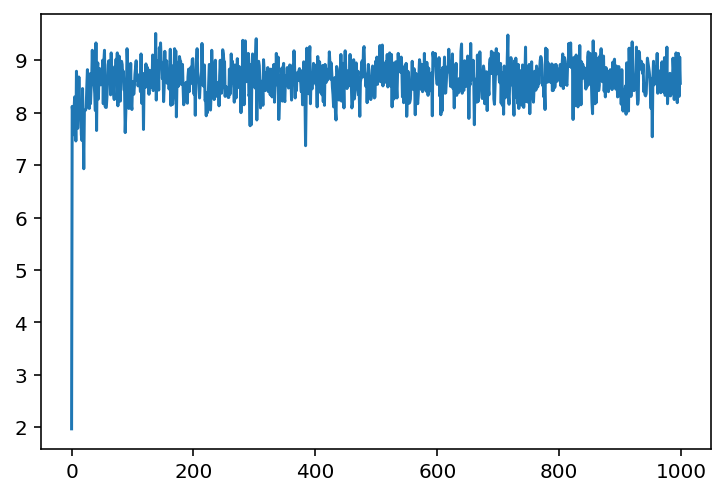

In [16]:
import matplotlib.pyplot as plt 
plt.plot(rewards)

<matplotlib.image.AxesImage object at 0x7f10f1437e80>

<Figure size 288x288 with 1 Axes>

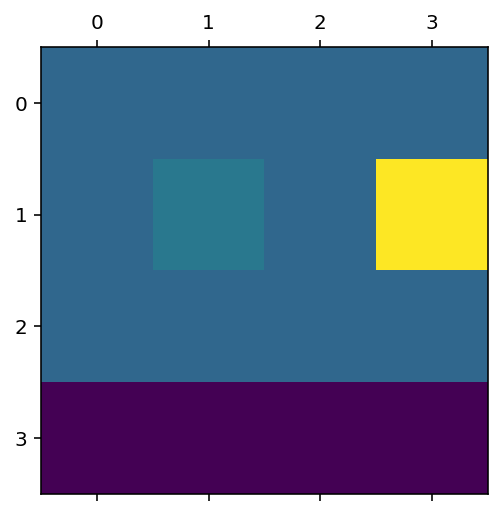

In [17]:
plt.matshow(env)

In [18]:
act = "LDRU"
for i in range(4):
    for j in range(4):
        print(act[g.q[i, j].argmax()], end=" ")

    print()

D L D L 
D L R L 
R R R U 
U U U U 


<Figure size 288x288 with 2 Axes>

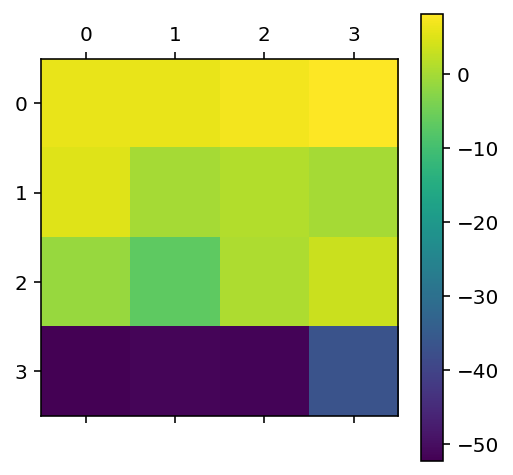

<Figure size 288x288 with 2 Axes>

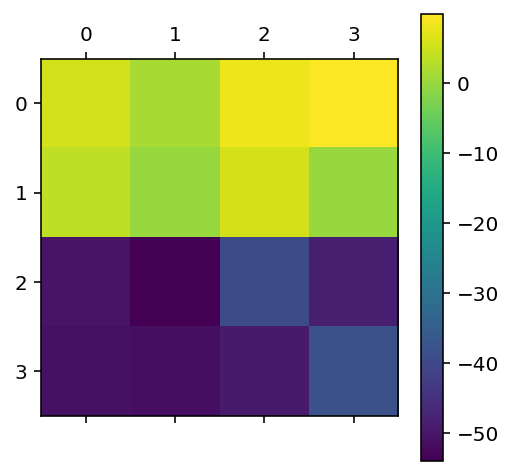

<Figure size 288x288 with 2 Axes>

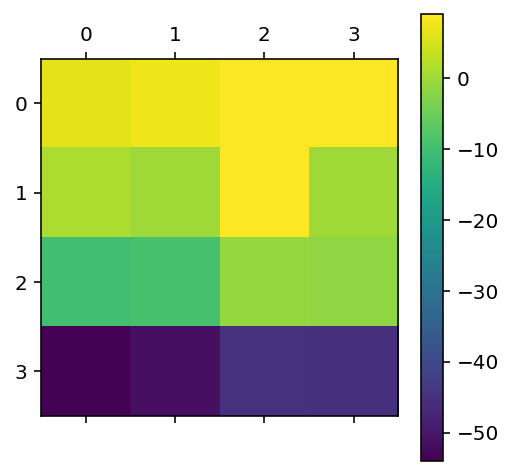

<Figure size 288x288 with 2 Axes>

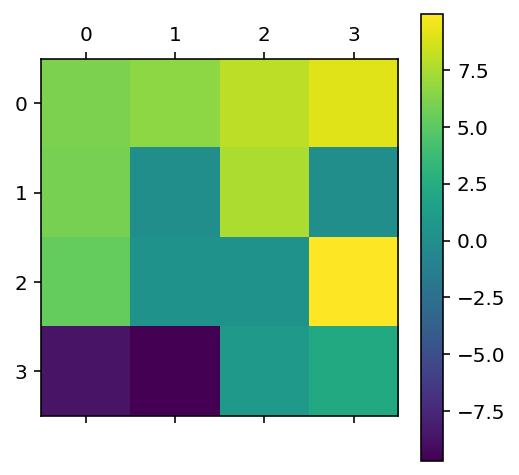

In [8]:
for i in range(4):
    plt.matshow(g.q[:, :, i])
    plt.colorbar()
    plt.show()